In [27]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [52]:
dir_path = '/Users/osipova/Documents/LabDocs/Bird_transcriptomics/Transcriptome_for_NectarGenomics/Phylo_model/'

In [29]:
## Load meta data
# Read lables from the info.tsv file into a dictionary
file_name = '../ALL_info.tsv'
d_labels = {}
with open(file_name, 'r') as inf:
    for line in inf.readlines():
        lib = line.split()[0]
        sample = line.split()[1]
        bird = line.split()[2]
        tissue = line.split()[3]
        d_labels[lib] = (sample, bird, tissue)

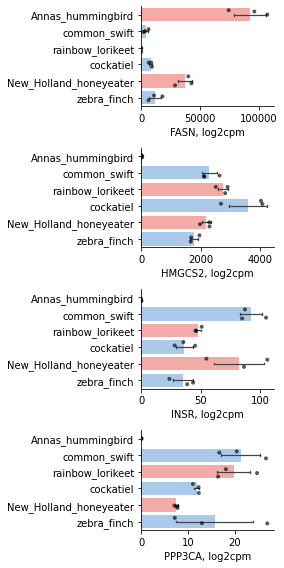

In [49]:
## Plot log2 CPM for a gene
p = sns.color_palette('pastel', n_colors=4)
p = [p[3], p[0]] * 3
sns.set_palette(p)

bird_order = pairs = ['Annas_hummingbird', 'common_swift',
                      'rainbow_lorikeet', 'cockatiel',
                      'New_Holland_honeyeater', 'zebra_finch']

value = 'log2CPM'

# choose list of genes to plot
liver_genes = ['FASN', 'HMGCS2', 'INSR', 'PPP3CA']
pectoralis_genes = ['BRAF', 'BMPR2', 'SORBS1', 'FASN', 'INSR', 'PPP3CA']
heart_genes = ['GATA6', 'PPP3CA']
duodenum_genes = ['SCP2', 'FASN', 'BMPR2']

gene_lists = {'liver': liver_genes,
              'pectoralis': pectoralis_genes,
              'heart': heart_genes,
              'duodenum': duodenum_genes}

t = 'liver'
gene_list = gene_lists[t]
i_max = len(gene_list)
fig, axes = plt.subplots(i_max, 1, figsize=(4, i_max*2))

file_name = 'noNA.{}.ALL_gene_table.tsv.transform'.format(t)
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

i = 0
for gene in gene_list:
    df_gene = df[df['gene'] == gene].set_index('gene').T
    df_gene.columns = [value]
    df_gene['bird'] = [d_labels[l][1] for l in df_gene.index]
    df_gene['tissue'] = [d_labels[l][2] for l in df_gene.index]
    df_gene['cpm'] = 2 ** df_gene[value]
    
    axi = axes[i]
    sns.barplot(ax=axi, data=df_gene, y='bird', x='cpm', order=bird_order, errwidth=1.2, capsize=.1, ci='sd')
    sns.stripplot(ax=axi, data=df_gene, y='bird', x='cpm', order=bird_order, 
                  color='k', s=4, alpha=0.65, dodge=True , jitter=0.3)
    axi.set_ylabel('')
    axi.set_xlabel('{}, log2cpm'.format(gene))
    i += 1

sns.despine(fig=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

pdf_name = 'cpm.candidate_genes.{}.phydget.pdf'.format(t)
# plt.savefig(pdf_name, bbox_inches="tight")

In [ ]:
### Analyze parameters of the models

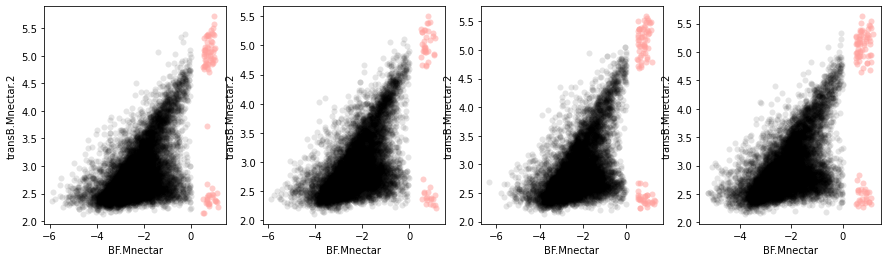

In [78]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
p = sns.color_palette('pastel', n_colors=4)
p = [p[3], p[0]] * 3
sns.set_palette(p)

i = 0
for t in ['liver', 'pectoralis', 'heart', 'duodenum']:
    axi = axes[i]
    file_name = 'phydget.all.test3_{}.out.tsv'.format(t)
    file_data = glob(dir_path + file_name)[0]
    dfi = pd.read_csv(file_data, sep='\t')
    null_df = dfi[dfi['bestmodel'] == 'Null']
    nectar_df = dfi[(dfi['bestmodel'] == 'Mnectar') & (dfi['BF.Mnectar'] >= .5)]

    sns.scatterplot(ax=axi, data=null_df, 
                    y='transB.Mnectar.2', x='BF.Mnectar',
                    alpha=0.1, linewidth=0, color='black')

    sns.scatterplot(ax=axi, data=nectar_df, 
                    y='transB.Mnectar.2', x='BF.Mnectar',
                    alpha=0.5, linewidth=0, color=p[0])
    i += 1



In [72]:
null_df.head()

,gene,L.null,L.Mnectar,BF.Mnectar,alpha.null,alpha.Mnectar,sigmasq.null,sigmasq.Mnectar,transB.Mnectar.0,signB.Mnectar.0,transB.Mnectar.1,signB.Mnectar.1,transB.Mnectar.2,signB.Mnectar.2,bestmodel,bestmargin
0,ADCYAP1,-17.874057,-18.782946,-1.817778,-3.165923,-2.902738,0.100713,0.063255,2.689870,+,2.999584,-,2.701766,-,Null,0.908889
1,CTSA,-18.030517,-20.076456,-4.091878,4.246648,1.418163,0.112579,0.118599,2.370492,-,2.368132,+,2.393876,-,Null,2.045939
2,ARHGEF10,-16.854858,-18.203132,-2.696548,2.179894,2.595476,0.059527,0.033437,2.452379,-,2.501922,-,3.144431,+,Null,1.348274
3,C5orf24,-15.650317,-16.887364,-2.474094,5.384380,4.853119,0.032703,0.021196,2.945313,+,2.548083,-,2.826452,+,Null,1.237047
4,DDX52,-16.068813,-16.604745,-1.071864,5.510983,5.796245,0.027600,0.013876,2.743066,-,2.815314,-,2.844495,+,Null,0.535932


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


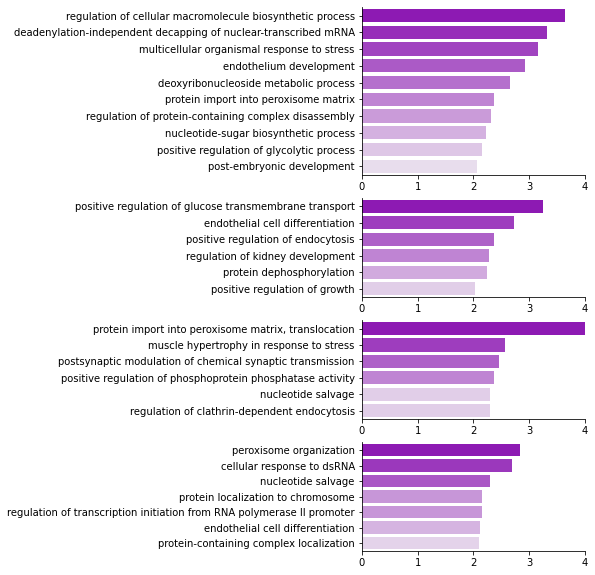

In [26]:
## Metascape enrichment analysis

fig, axes = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1.7, 1, 1, 1.1]}, figsize=(4, 10))

i = 0
for t in ['liver', 'pectoralis', 'heart', 'duodenum']:
    file_name = 'Metascape_enrichment/genes.go_enrich.{}.Mnectar.tsv'.format(t)
    file_data = glob(dir_path + file_name)[0]
    dfi = pd.read_csv(file_data, sep='\t')
    
    axi = axes[i]
    r = [int(i) for i in list(-dfi.rank(method='max')['Log10P'])]
    p = sns.diverging_palette(250, -70, 123, 35, as_cmap=False, n=len(r)*2+1)[len(r):]
    p_ranked = [p[i] for i in r]
    sns.barplot(ax=axi, data=dfi, x=-dfi['Log10P'], y='Description', palette=p_ranked)
    axi.set_ylabel('')
    axi.set_xlabel('')
    axi.set(xlim=(0, 4))
    i += 1

sns.despine(fig=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

pdf_name = 'meatscape_enrich.all_tissues.phydget.log10P.pdf'
# plt.savefig(pdf_name, bbox_inches="tight")